# Engine Failure Detection

## What is this notebook about?

This notebook deals with an exercise of Monitoring and Design of Systems.\
Specifically it applies some *Exploratory Data Analysis*, *Data Visualization*, *Data Processing* and *Statical Methods* for *monitoring*.\
The data used come from an online data repository at [Kaggle](https://www.kaggle.com/datasets/ziya07/engine-failure-detection-dataset/data). The **data are simulated**, from **synthetic** sensor readings of various type of engines to detect mechanical failures, particularly in automotive applications.\
It captures data related to engine performance, fault conditions, and operational modes over a series of intervals.

<div>
<img src="engine.JPG" style="width:33%">
</div>

### Dataset characteristics

- **Size:** The dataset contains 1,000 records, each representing a snapshot of the engine's performance at a specific time.
- **Fault Conditions:** The dataset includes four levels of fault conditions, ranging from normal (0) to severe fault (3), which can help train models to predict and diagnose potential engine failures.
- **Generated Data:** The data are synthetic, designed to simulate typical engine performance and fault scenarios.
- **Sensor Data:** The data includes key operational metrics like temperature, RPM, fuel efficiency, vibration, torque, and power output, all of which can influence the detection of faults in the engine.

## Import packages

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv('engine_failure_dataset.csv')

### Exploratory Data Analysis

In [15]:
data.head()

Time_Stamp  Temperature (°C)          RPM  Fuel_Efficiency  \
0  2024-12-24 10:00:00         60.308585  3426.827588        20.445472   
1  2024-12-24 10:05:00        112.705055  2949.758424        23.083947   
2  2024-12-24 10:10:00        108.670976  1817.971040        20.555326   
3  2024-12-24 10:15:00        107.114691  2730.660539        23.226431   
4  2024-12-24 10:20:00        118.075814  1854.488677        21.148226   

   Vibration_X  Vibration_Y  Vibration_Z      Torque  Power_Output (kW)  \
0     0.874657     0.005686     0.529798  107.877659          23.367684   
1     0.696461     0.391779     0.124336   60.351655          57.941022   
2     0.495276     0.189714     0.886417  110.986564          47.732998   
3     0.986206     0.983202     0.468114   77.416793          44.112039   
4     0.710810     0.101139     0.481034  100.475881          80.681972   

   Fault_Condition Operational_Mode  
0                2             Idle  
1                3         Cruising  
2                2         Cruising  
3                2         Cruising  
4                2         Cruising

As we can see from the table above that shows the first 5 rows, the dataset is labeled with the fault condition of the engine for each sample.

In [16]:
data.shape

(1000, 11)

There are **1000 samples**, starting from the 24th Dec 2024, to the 27th Dec 2024, with a sample rate of **a sample every 5 minutes**

In [17]:
data.info() #some statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time_Stamp         1000 non-null   object 
 1   Temperature (°C)   1000 non-null   float64
 2   RPM                1000 non-null   float64
 3   Fuel_Efficiency    1000 non-null   float64
 4   Vibration_X        1000 non-null   float64
 5   Vibration_Y        1000 non-null   float64
 6   Vibration_Z        1000 non-null   float64
 7   Torque             1000 non-null   float64
 8   Power_Output (kW)  1000 non-null   float64
 9   Fault_Condition    1000 non-null   int64  
 10  Operational_Mode   1000 non-null   object 
dtypes: float64(8), int64(1), object(2)
memory usage: 86.1+ KB


In [30]:
data.drop('Time_Stamp', axis=1, inplace= True) # Drop column -> 'Time_Stamp'

x = data.drop('Fault_Condition', axis= 1) #x is a copy of our dataset without the Fault_condition column
y = data['Fault_Condition'] #y is just the vector with all the fault conditions

numeric_features = x.select_dtypes(exclude= ['object']).columns 
string_features = x.select_dtypes(include= ['object']).columns #Operational_mode vector

## Statistics 

C:\Users\Francesco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Francesco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Francesco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Francesco\

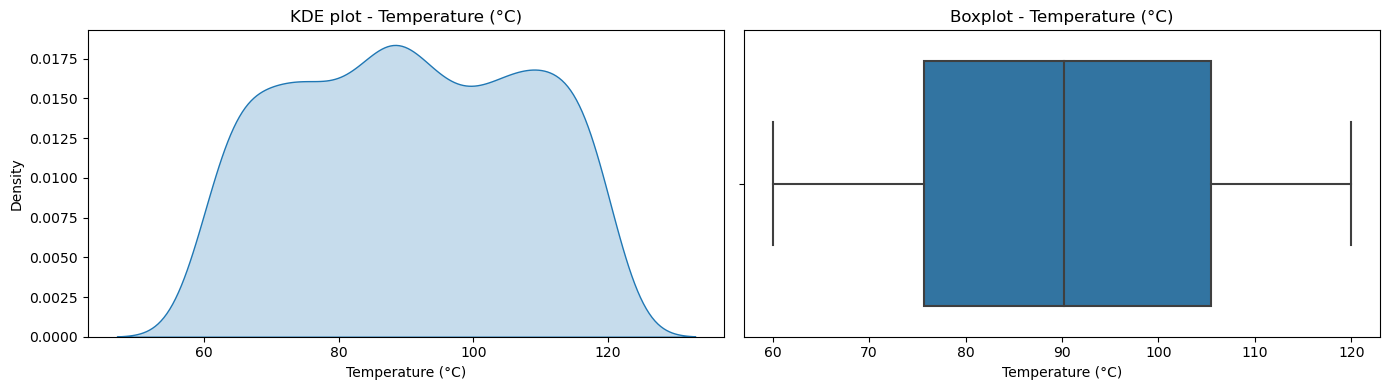

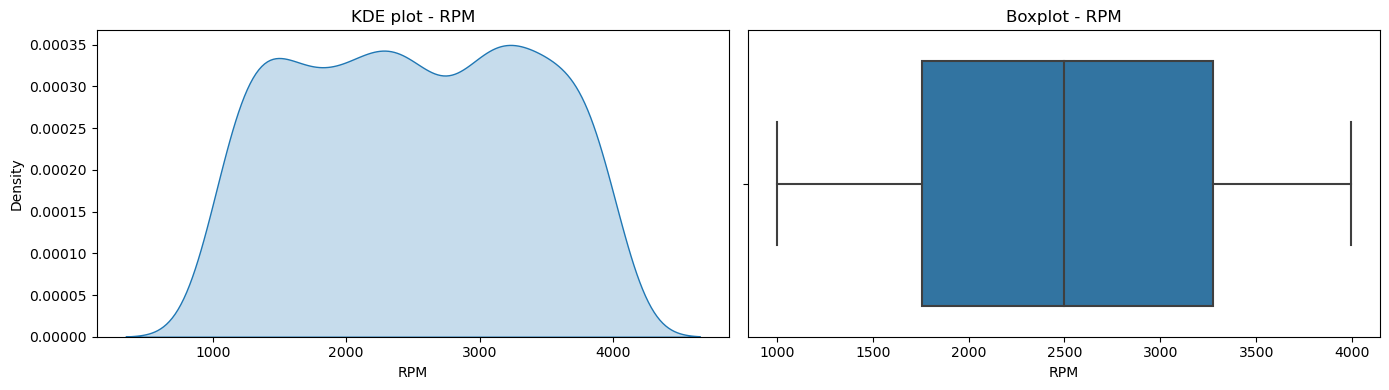

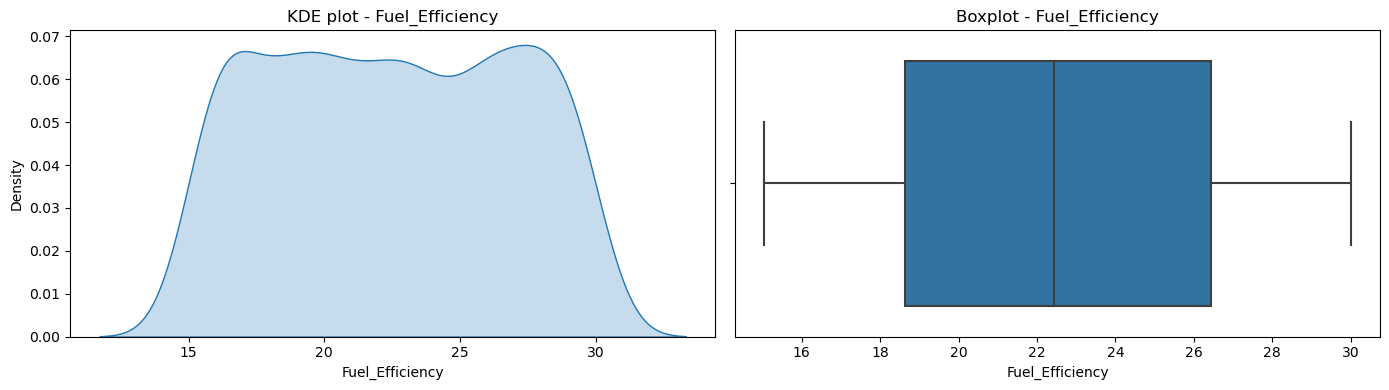

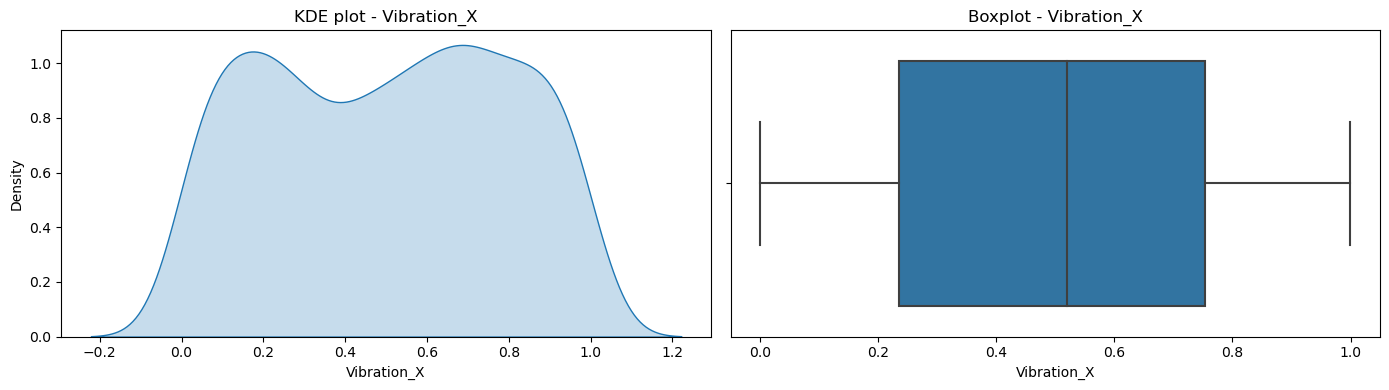

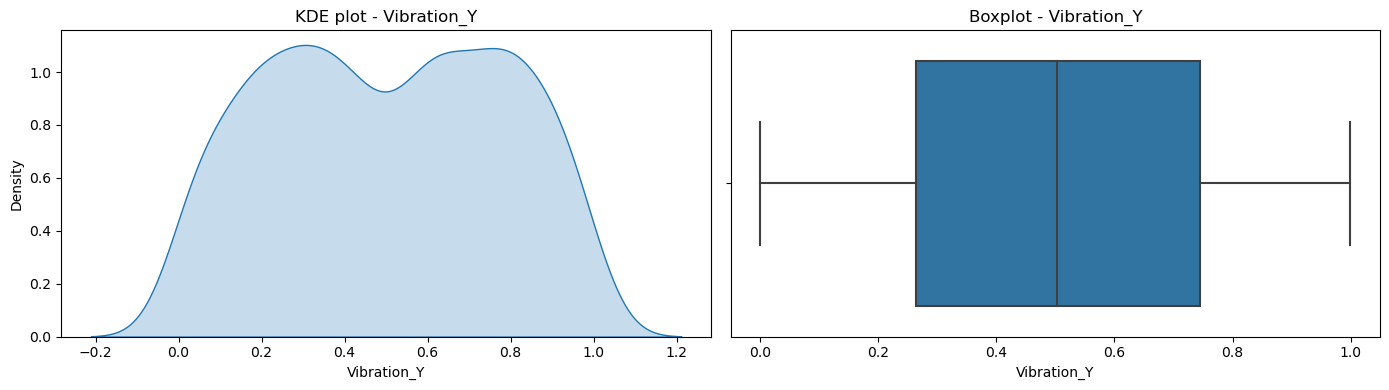

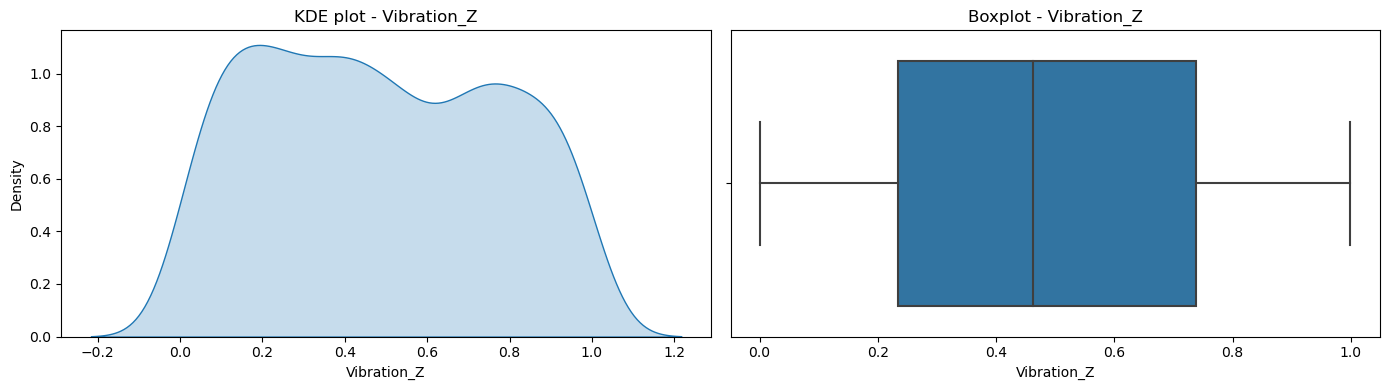

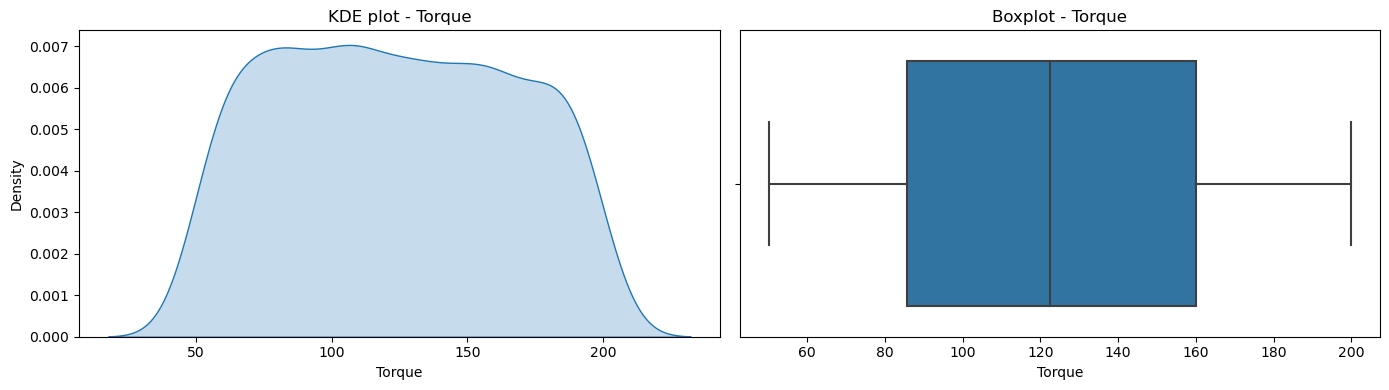

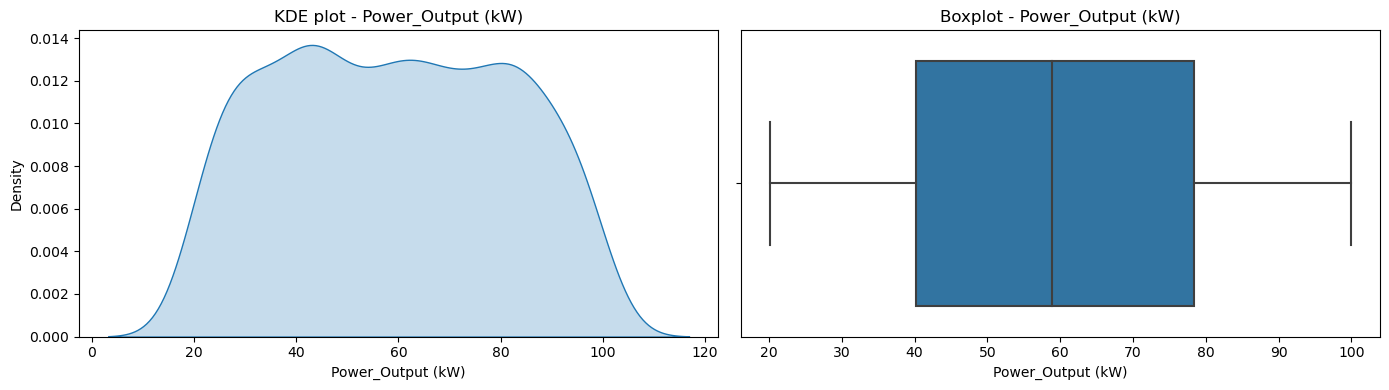

In [21]:
# Numeric features
for col in numeric_features:

    plt.figure(figsize= (14, 4)) #general dimensions for all plots

    #Kernel Density Estimation 
    plt.subplot(121)
    sns.kdeplot(data[col], fill=True)
    plt.title(f'KDE plot - {col}')

    #Boxplot
    plt.subplot(122)
    sns.boxplot(data[col])
    plt.title(f'Boxplot - {col}')
    

### Pairplot

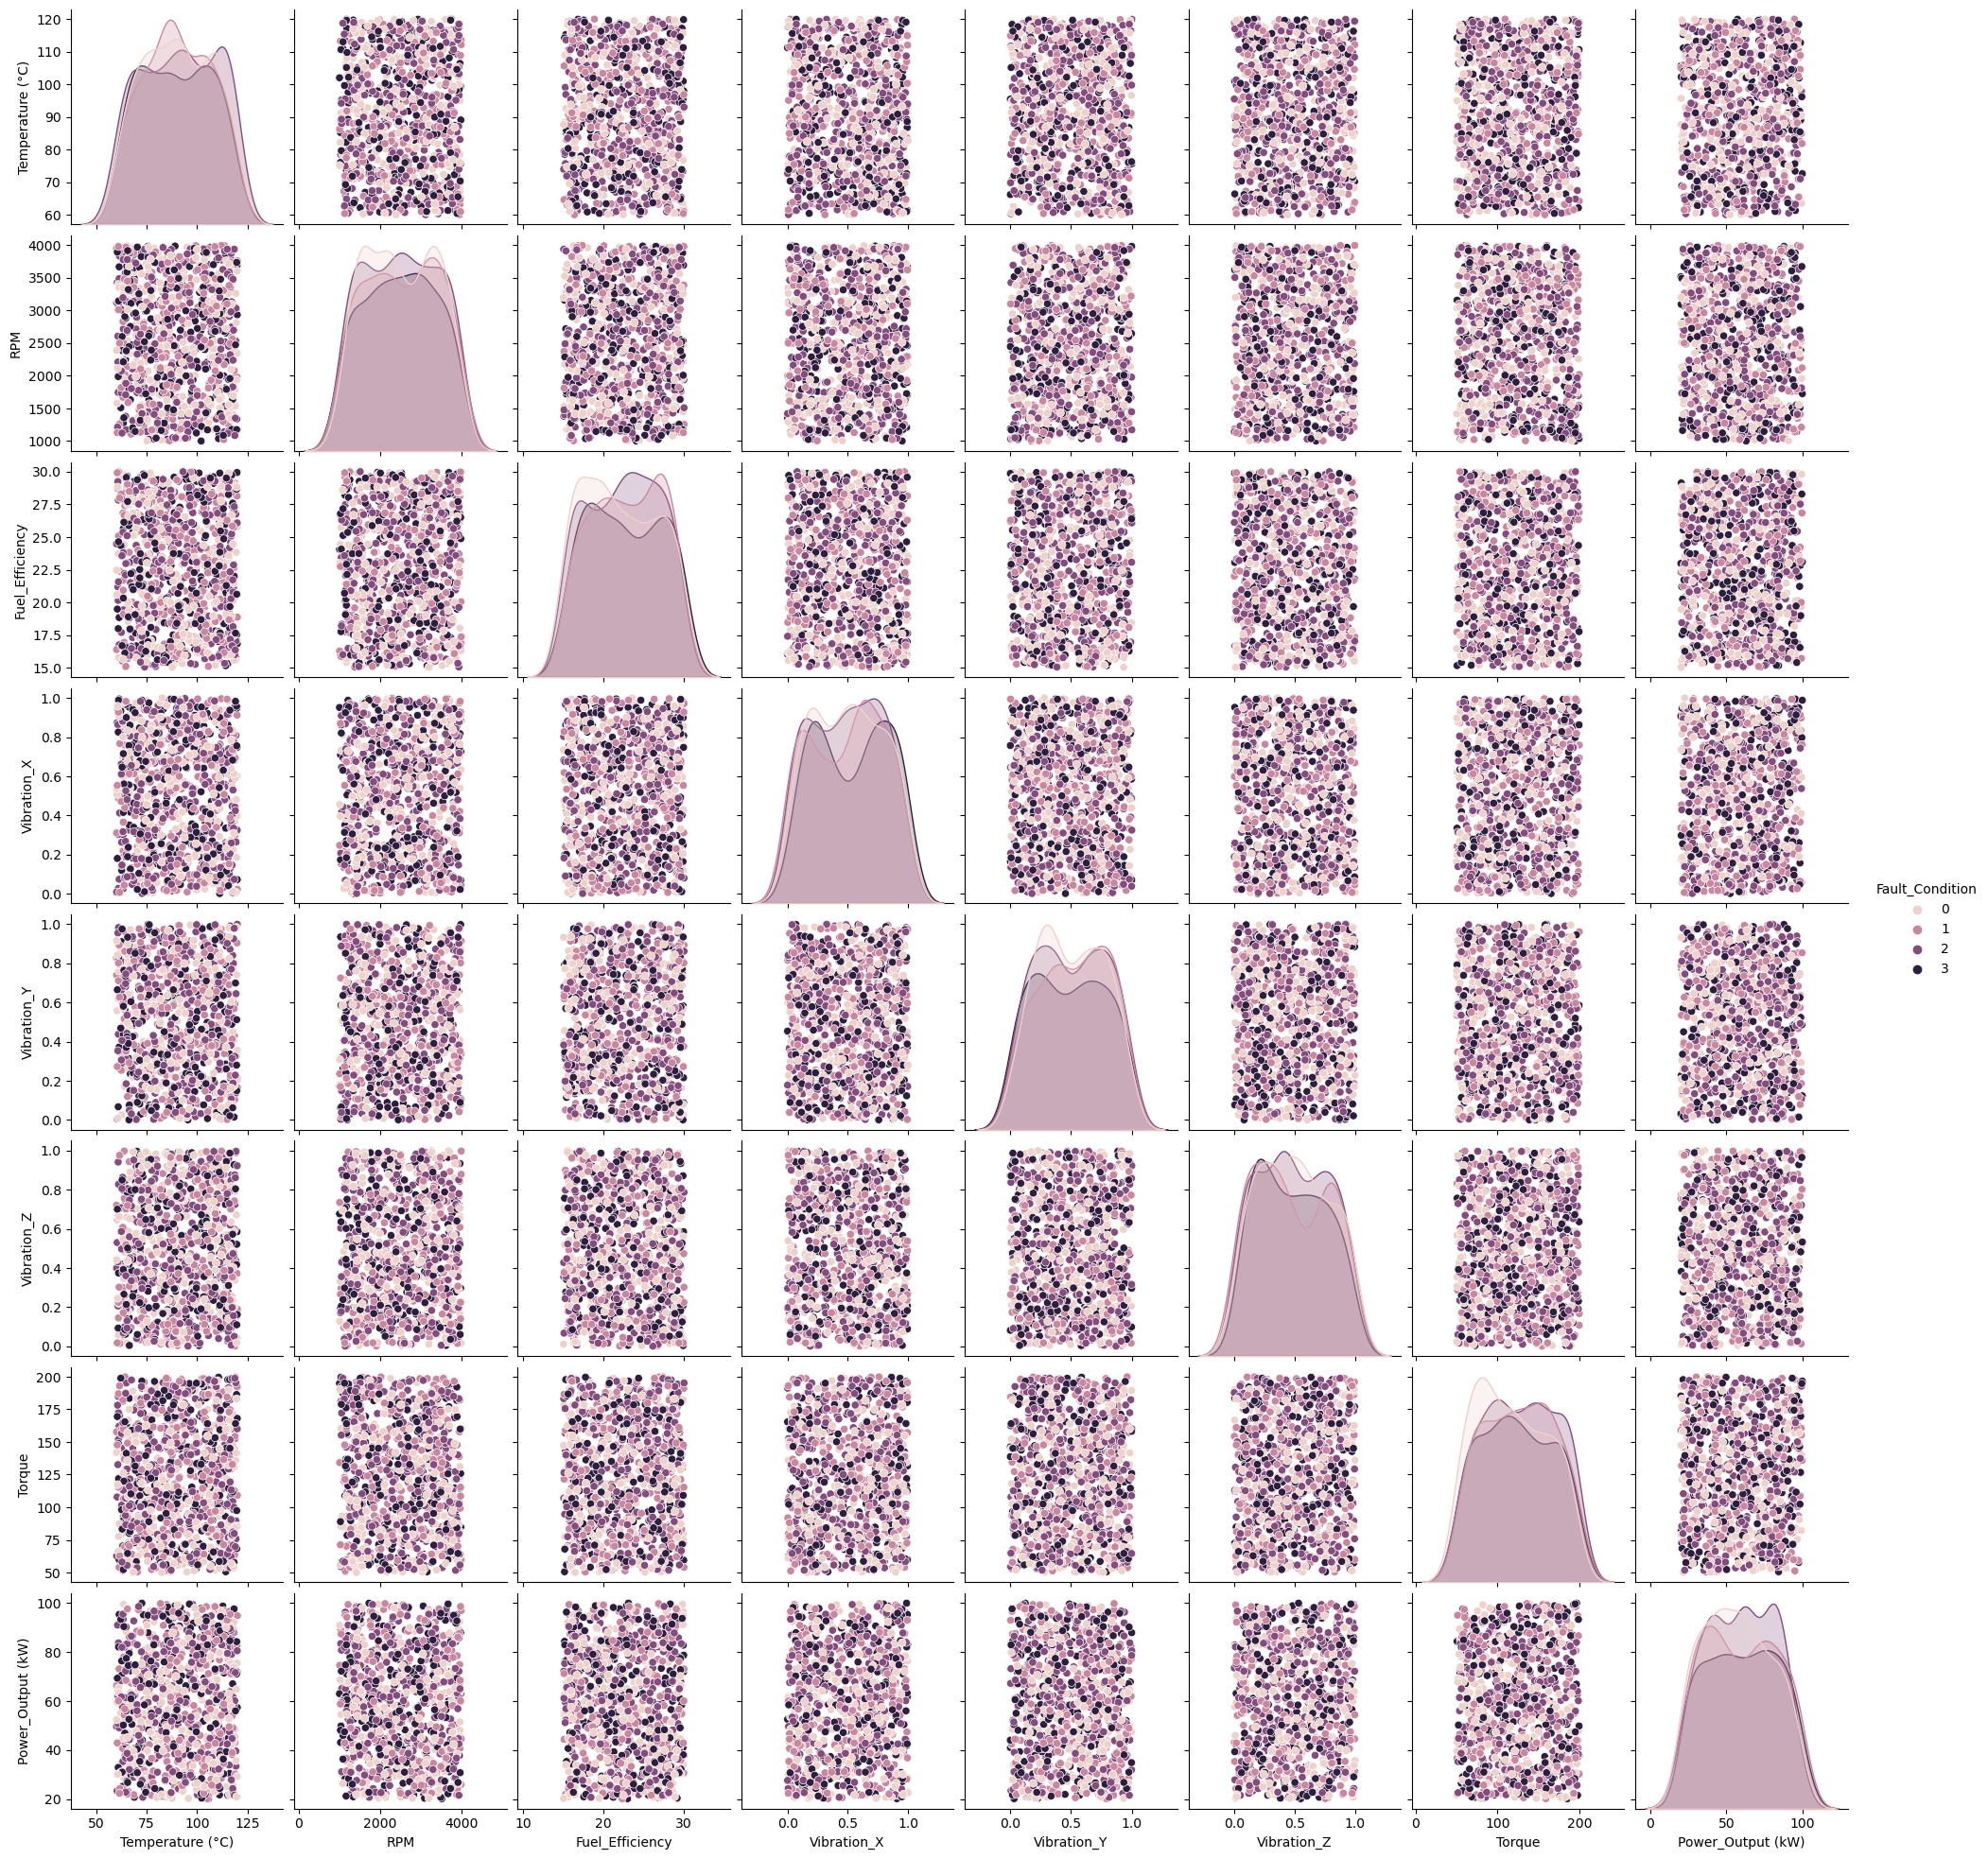

In [22]:
# Pairplot
sns.pairplot(data, 
             hue = 'Fault_Condition' #differentiate data points based on fault conditions
            )

The pairplot matrix above shows the relations between pairs of variables through scatterplots, but we can see that there are not explicit connections between them at first glance.

Hence a correlation matrix could help us a bit more.

### Correlation matrix

<AxesSubplot:>

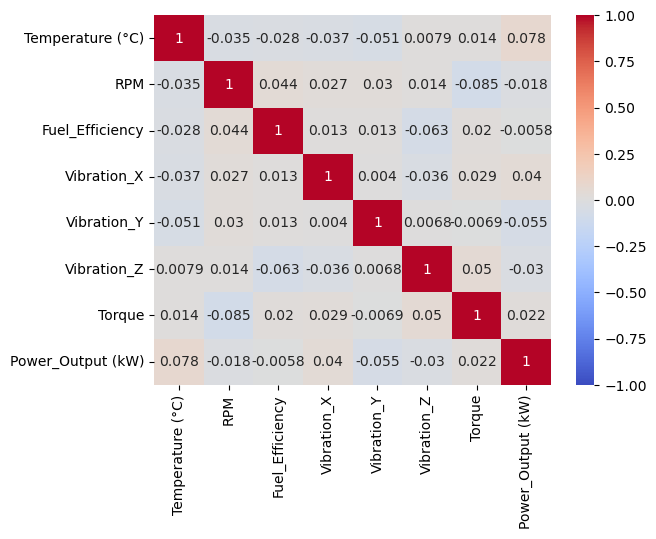

In [31]:
# Heatmap of the correlation matrix
corr_matrix= x[numeric_features].corr()
# Create heatmap with custom scale
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='coolwarm', annot=True)

## Features importance

The following image shows the importance of the features for predicting the fault

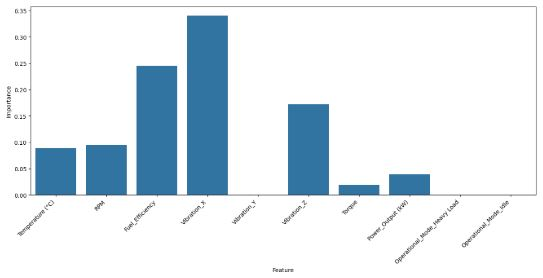

The results of the *features impartance* are obtained from an online analysis of the dataset [link](https://www.kaggle.com/code/bommanaayush/ada-boost-engine-failure-detection/notebook), unsing the **AdaBoost classifier**.\
AdaBoost (short for Adaptive Boosting) is a statistical classification meta-algorithm formulated by Yoav Freund and Robert Schapire in 1995, who won the 2003 Gödel Prize for their work. It can be used in conjunction with many types of learning algorithm to improve performance. The output of multiple weak learners is combined into a weighted sum that represents the final output of the boosted classifier. Usually, AdaBoost is presented for binary classification, although it can be generalized to multiple classes or bounded intervals of real values. [Wikipedia](https://en.wikipedia.org/wiki/AdaBoost)

The link: [engine-vibrations-among-xyz-axes.onrender.com](https://engine-vibrations-among-xyz-axes.onrender.com), links to a dashboard that show the relation between **Root Mean Square** and the severity of the fault, for the three axis, furthermore an analysis of the **frequency spectrum** of the vibrations is performed through the Fast Fourier Trasform, with the **baselines** and **thresholds** added.


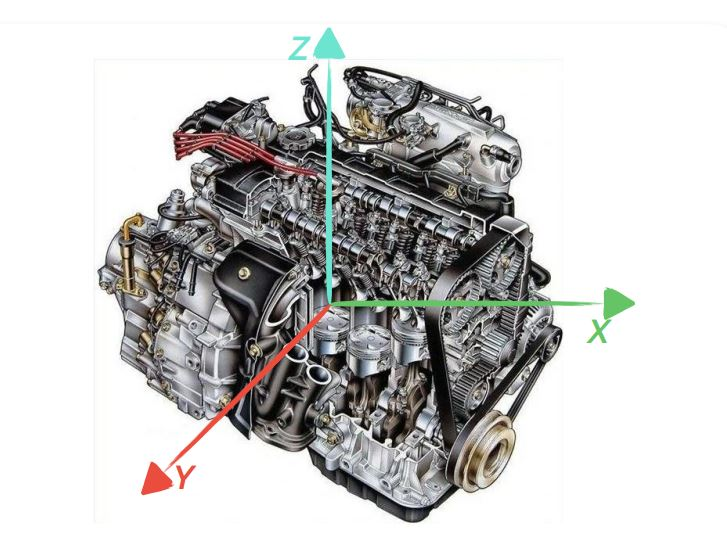